In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:\\Users\\rahul\\Data Science\\Material\\titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
mean = df['Age'].mean()

In [6]:
mean

29.69911764705882

In [7]:
df['Age'].isnull().sum()

177

In [9]:
df['Age'] = df['Age'].fillna(mean)

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [12]:
df['Cabin'].count()

204

In [13]:
df= df.drop(['Cabin'], axis = 1)

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [16]:
df_obj = df.select_dtypes(include = ['object']).copy()
df_obj.head(10)

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
5,"Moran, Mr. James",male,330877,Q
6,"McCarthy, Mr. Timothy J",male,17463,S
7,"Palsson, Master. Gosta Leonard",male,349909,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,C


In [17]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Embarked  889 non-null    object
dtypes: object(4)
memory usage: 28.0+ KB


In [18]:
df_obj['Sex'] = df_obj['Sex'].map({'male': 0, 'female': 1})
df_obj['Embarked'] = df_obj['Embarked'].astype('category').cat.codes
df_obj['Ticket'] = df_obj['Ticket'].astype('category').cat.codes

In [24]:
df[df_obj.columns] = df_obj

In [27]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,523,7.2500,2
1,2,1,1,1,38.0,1,0,596,71.2833,0
2,3,1,3,1,26.0,0,0,669,7.9250,2
3,4,1,1,1,35.0,1,0,49,53.1000,2
4,5,0,3,0,35.0,0,0,472,8.0500,2


In [26]:
df.drop(['Name'], axis = 1,inplace = True)

In [29]:
df.set_index('PassengerId', inplace=True)

In [33]:
df.reset_index(inplace=True)

In [34]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.000000,1,0,523,7.2500,2
1,2,1,1,1,38.000000,1,0,596,71.2833,0
2,3,1,3,1,26.000000,0,0,669,7.9250,2
3,4,1,1,1,35.000000,1,0,49,53.1000,2
4,5,0,3,0,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,101,13.0000,2
887,888,1,1,1,19.000000,0,0,14,30.0000,2
888,889,0,3,1,29.699118,1,2,675,23.4500,2
889,890,1,1,0,26.000000,0,0,8,30.0000,0


In [49]:
x = df.iloc[:,2:]

In [50]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,0,22.000000,1,0,523,7.2500,2
1,1,1,38.000000,1,0,596,71.2833,0
2,3,1,26.000000,0,0,669,7.9250,2
3,1,1,35.000000,1,0,49,53.1000,2
4,3,0,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,101,13.0000,2
887,1,1,19.000000,0,0,14,30.0000,2
888,3,1,29.699118,1,2,675,23.4500,2
889,1,0,26.000000,0,0,8,30.0000,0


In [51]:
y = df.iloc[:,1]

In [52]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [54]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
709,3,0,29.699118,1,1,189,15.2458,0
439,2,0,31.000000,0,0,547,10.5000,2
840,3,0,20.000000,0,0,647,7.9250,2
720,2,1,6.000000,0,1,155,33.0000,2
39,3,1,14.000000,1,0,186,11.2417,0
...,...,...,...,...,...,...,...,...
433,3,0,17.000000,0,0,657,7.1250,2
773,3,0,29.699118,0,0,201,7.2250,0
25,3,1,38.000000,1,5,329,31.3875,2
84,2,1,17.000000,0,0,637,10.5000,2


In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
model = GaussianNB()

In [57]:
model.fit(x_train,y_train)

GaussianNB()

In [58]:
y_pred = model.predict(x_test)

In [59]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.770949720670391


In [67]:
print(confusion_matrix(y_test, y_pred))

[[81 24]
 [17 57]]


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       105
           1       0.70      0.77      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



## Logistic Regression

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df_lr = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Social_Network_Ads.csv')
df_lr.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [73]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [74]:
df_lr['Gender'] = df_lr['Gender'].map({'Male':0,'Female':1})

In [75]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [86]:
x = df_lr.iloc[:,2:4].values 

In [89]:
x.shape

(400, 2)

In [92]:
y = df_lr.iloc[:,-1].values

In [94]:
y.shape

(400,)

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

## scatter Plot (Training Dataset)

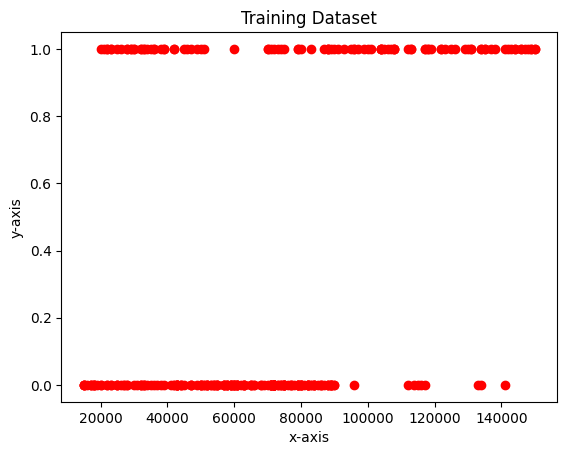

In [102]:
plt.scatter(x_train[:,1],y_train, color = 'red')
plt.title('Training Dataset')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

## Scatter Plot (Test Dataset)

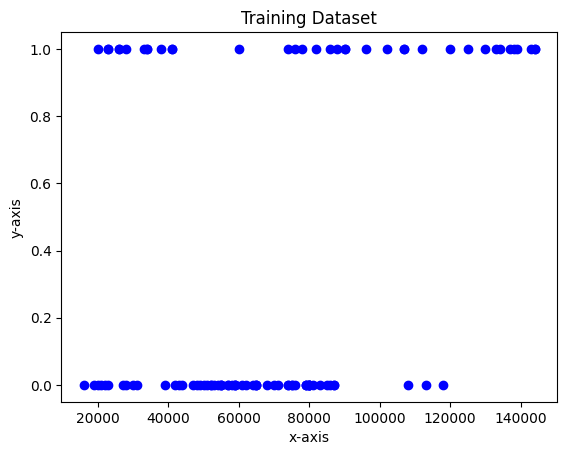

In [103]:
plt.scatter(x_test[:,1],y_test, color = 'blue')
plt.title('Training Dataset')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [104]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [105]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [106]:
y_pred = model_lr.predict(x_test)

In [107]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report
print(f'confusion_matrix:\n',confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[61  2]
 [10 27]]


In [110]:
print(f'accuracy_score:',accuracy_score(y_test,y_pred))

accuracy_score: 0.88


In [113]:
print(f'precision_score:',precision_score(y_test,y_pred))

precision_score: 0.9310344827586207


In [114]:
print(f'recall_score:',recall_score(y_test,y_pred))

recall_score: 0.7297297297297297


In [115]:
print(f'classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100



## KNN Algorithm

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df_knn = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Social_Network_Ads.csv')
df_knn.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [120]:
x = df_knn.iloc[:,2:4].values

In [122]:
y = df_knn.iloc[:,-1].values

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state = 42)

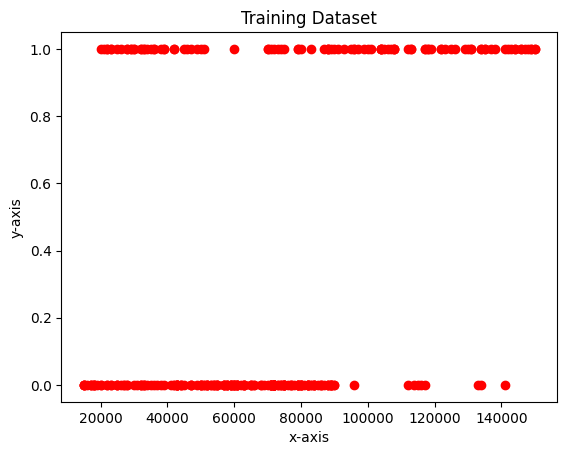

In [130]:
plt.scatter(x_train[:,1],y_train, color = 'red')
plt.title('Training Dataset')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [129]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier() #default neighbors is 5

In [131]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [132]:
y_pred = model_knn.predict(x_test)

In [136]:
from sklearn.metrics import classification_report
print(f'classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        63
           1       0.81      0.68      0.74        37

    accuracy                           0.82       100
   macro avg       0.82      0.79      0.80       100
weighted avg       0.82      0.82      0.82       100



## Using desired neighbors

In [151]:
model_knn = KNeighborsClassifier(n_neighbors=3) #default neighbors is 5

In [152]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [153]:
y_pred = model_knn.predict(x_test)
from sklearn.metrics import classification_report
print(f'classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        63
           1       0.78      0.68      0.72        37

    accuracy                           0.81       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.81      0.81      0.81       100



## using Standard Scaler

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [158]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [159]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [160]:
y_pred = model_knn.predict(x_test)
from sklearn.metrics import classification_report
print(f'classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.87      0.92      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



## SVM Algorithm

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
df_svm = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Social_Network_Ads.csv')
df_svm.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [181]:
x = df_svm.iloc[:,2:4].values

In [184]:
x.shape

(400, 2)

In [185]:
y = df_svm.iloc[:,-1].values

In [180]:
y.shape

(400,)

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 42)

In [187]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear')

In [188]:
model_svm.fit(x_train,y_train)

SVC(kernel='linear')

In [189]:
y_pred = model_svm.predict(x_test)

In [191]:
print(f'confusion_matrix:\n',confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[59  4]
 [10 27]]


In [190]:
from sklearn.metrics import classification_report,confusion_matrix
print(f'classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.89        63
           1       0.87      0.73      0.79        37

    accuracy                           0.86       100
   macro avg       0.86      0.83      0.84       100
weighted avg       0.86      0.86      0.86       100



## using Standard Scaler

In [202]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [203]:
model_svm.fit(x_train,y_train)

SVC(kernel='linear')

In [204]:
y_pred = model_svm.predict(x_test)

In [205]:
print(f'confusion_matrix:\n',confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[61  2]
 [12 25]]


In [206]:
from sklearn.metrics import classification_report,confusion_matrix
print(f'classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



## Decision Tree

In [207]:
import pandas as pd

In [208]:
df_dt = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Social_Network_Ads.csv')
df_dt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [209]:
x = df_dt.iloc[:,2:4].values

In [210]:
y = df_dt.iloc[:,-1].values

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25,random_state = 42)

In [212]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(criterion = 'gini',random_state = 0, max_depth = 5)

In [214]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [215]:
y_pred = model_dtc.predict(x_test)

In [216]:
from sklearn.metrics import confusion_matrix, classification_report
print(f'confusion_matrix:\n',confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[59  4]
 [ 7 30]]


In [217]:
print(f'classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.88      0.81      0.85        37

    accuracy                           0.89       100
   macro avg       0.89      0.87      0.88       100
weighted avg       0.89      0.89      0.89       100



## using entropy as criterion

In [218]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 0, max_depth = 5)

In [219]:
model_dtc.fit(x_train,y_train)
y_pred = model_dtc.predict(x_test)

In [220]:
print(f'confusion_matrix:\n',confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[59  4]
 [ 8 29]]


In [221]:
print(f'classification_report:\n',classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        63
           1       0.88      0.78      0.83        37

    accuracy                           0.88       100
   macro avg       0.88      0.86      0.87       100
weighted avg       0.88      0.88      0.88       100



## Linear Regression

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [223]:
df_lnr = pd.read_csv('C:\\Users\\rahul\\Data Science\\Material\\Salary_Data.csv')
df_lnr.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [237]:
x = df_lnr[['YearsExperience']]

In [238]:
y = df_lnr[['Salary']]

In [240]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

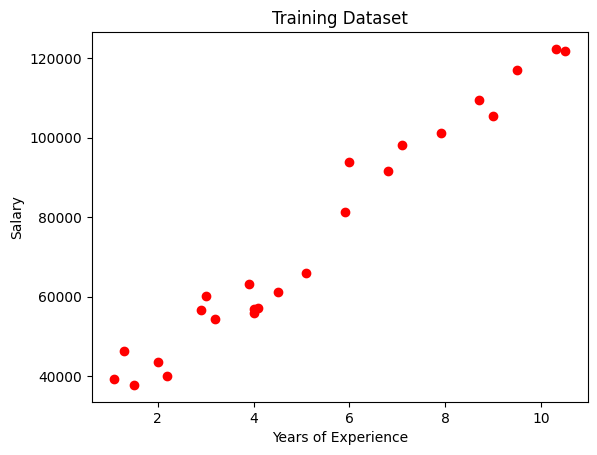

In [241]:
plt.scatter(x_train,y_train,color ='red')
plt.title('Training Dataset')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [242]:
from sklearn.linear_model import LinearRegression
model_lnr = LinearRegression()
model_lnr.fit(x_train,y_train)

LinearRegression()

In [243]:
y_pred = model_lnr.predict(x_test)

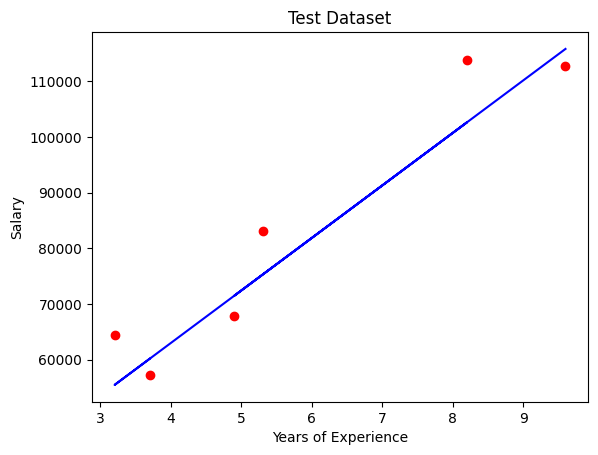

In [250]:
plt.scatter(x_test,y_test,color ='red')
plt.plot(x_test,y_pred,color='blue')
plt.title('Test Dataset')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [254]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(f'r2_score:\n',r2_score(y_test,y_pred))

r2_score:
 0.9024461774180497


In [248]:
print(f'mean_squared_error:\n',mean_squared_error(y_test,y_pred))

mean_squared_error:
 49830096.85590839


In [253]:
print(f'root_mean_squared_error:\n',np.sqrt(mean_squared_error(y_test, y_pred)))

root_mean_squared_error:
 7059.04362190151


In [255]:
print(f'mean_absolute_error:\n',mean_absolute_error(y_test,y_pred))

mean_absolute_error:
 6286.453830757749
